# Introduction: Machine Learning Project Part 2

1. Data cleaning and formatting
  - 데이터 정리및 서식 지정
2. Exploratory data analysis
  - 탐색적 데이터 분석(EDA)
3. Feature engineering and selection
  - 기능 엔지니어링 및 선택
4. Establish a baseline and compare several machine learning models on a performance metric
  - 기준을 설정 및 성능 메트릭에서 여러 기계 학습 모델 비교
5. Perform hyperparameter tuning on the best model to optimize it for the problem
  - 문제에 대해 최적화하기 위해 최상의 모델에 대해 하이퍼파라미터 조정
6. Evaluate the best model on the testing set
  - 테스트 세트에서 최상의 모델 평가
7. Interpret the model results to the extent possible
  - 가능한 한 모델 결과를 해석
8. Draw conclusions and write a well-documented report
  - 결론을 도출하고 잘 문서화된 보고서 작성

본 ipnyb 파일에서는 위의 단계 중 4-6을 다룰 것이다.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/파이썬코드/Energy score 예측 (1)

/content/drive/MyDrive/파이썬코드/Energy score 예측 (1)


### Imports 
필요한 패키지의 모듈들을 import 한다.

In [ ]:
#1
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 60)

# Matplotlib for visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Imputing missing values and scaling values
from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import imputer
# 이것은 서비스 종료함
# 주석처리되지 않은 걸로 해야됨

from sklearn.preprocessing import MinMaxScaler

# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Evaluation
from sklearn.metrics import mean_absolute_error

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

### 데이터 읽기

Part 1에서 저장한 csv파일들을 읽어들인다.

In [ ]:
#2
# Read in data into dataframes 
train_features = pd.read_csv('training_features.csv')
test_features = pd.read_csv('testing_features.csv')
train_labels = pd.read_csv('training_labels.csv')
test_labels = pd.read_csv('testing_labels.csv')

# Display sizes of data
print('Training Feature Size: ', train_features.shape)
print('Testing Feature Size:  ', test_features.shape)
print('Training Labels Size:  ', train_labels.shape)
print('Testing Labels Size:   ', test_labels.shape)

Training Feature Size:  (6622, 64)
Testing Feature Size:   (2839, 64)
Training Labels Size:   (6622, 1)
Testing Labels Size:    (2839, 1)


Feature들 살펴보기

In [ ]:
train_features.head(12)

,Order,Property Id,DOF Gross Floor Area,Year Built,Number of Buildings - Self-reported,Occupancy,Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Water Intensity (All Water Sources) (gal/ft²),Latitude,Longitude,Community Board,Census Tract,log_Direct GHG Emissions (Metric Tons CO2e),log_Water Intensity (All Water Sources) (gal/ft²),Borough_Staten Island,Largest Property Use Type_Adult Education,Largest Property Use Type_Automobile Dealership,Largest Property Use Type_Bank Branch,Largest Property Use Type_College/University,Largest Property Use Type_Convenience Store without Gas Station,Largest Property Use Type_Courthouse,Largest Property Use Type_Distribution Center,Largest Property Use Type_Enclosed Mall,Largest Property Use Type_Financial Office,Largest Property Use Type_Hospital (General Medical & Surgical),Largest Property Use Type_Hotel,Largest Property Use Type_K-12 School,Largest Property Use Type_Library,...,Largest Property Use Type_Multifamily Housing,Largest Property Use Type_Museum,Largest Property Use Type_Non-Refrigerated Warehouse,Largest Property Use Type_Other,Largest Property Use Type_Other - Education,Largest Property Use Type_Other - Entertainment/Public Assembly,Largest Property Use Type_Other - Lodging/Residential,Largest Property Use Type_Other - Mall,Largest Property Use Type_Other - Public Services,Largest Property Use Type_Other - Recreation,Largest Property Use Type_Other - Services,Largest Property Use Type_Other - Specialty Hospital,Largest Property Use Type_Outpatient Rehabilitation/Physical Therapy,Largest Property Use Type_Parking,Largest Property Use Type_Performing Arts,Largest Property Use Type_Pre-school/Daycare,Largest Property Use Type_Refrigerated Warehouse,"Largest Property Use Type_Repair Services (Vehicle, Shoe, Locksmith, etc.)",Largest Property Use Type_Residence Hall/Dormitory,Largest Property Use Type_Residential Care Facility,Largest Property Use Type_Restaurant,Largest Property Use Type_Retail Store,Largest Property Use Type_Self-Storage Facility,Largest Property Use Type_Senior Care Community,Largest Property Use Type_Social/Meeting Hall,Largest Property Use Type_Strip Mall,Largest Property Use Type_Supermarket/Grocery Store,Largest Property Use Type_Urgent Care/Clinic/Other Outpatient,Largest Property Use Type_Wholesale Club/Supercenter,Largest Property Use Type_Worship Facility
0,13276,5849784,90300.0,1950,1,100,126.0,5.2,1.2,99.41,NaN,NaN,NaN,NaN,6.088818,4.599253,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7377,4398442,52000.0,1926,1,100,95.4,4.7,0.9,NaN,40.835496,-73.887745,3.0,161.0,5.384036,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9479,4665374,104700.0,1954,1,100,40.4,3.8,0.3,NaN,40.663206,-73.949469,9.0,329.0,5.017280,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,14774,3393340,129333.0,1992,1,100,157.1,16.9,1.1,NaN,40.622968,-74.078742,1.0,27.0,6.510853,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,3286,2704325,109896.0,1927,1,100,62.3,3.5,0.0,28.65,40.782421,-73.972622,7.0,165.0,6.123589,3.355153,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1060,2430725,182655.0,1929,1,90,52.9,9.7,0.2,4.80,40.725136,-74.004438,2.0,37.0,5.516649,1.568616,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,10846,5737475,65400.0,1942,1,100,66.8,3.0,0.6,67.14,40.637833,-73.973045,12.0,490.0,5.426271,4.206780,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,4280,2670505,113150.0,1938,1,100,78.4,5.7,NaN,30.73,40.776035,-73.964418,8.0,142.0,6.067036,3.425239,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,12974,2964670,137

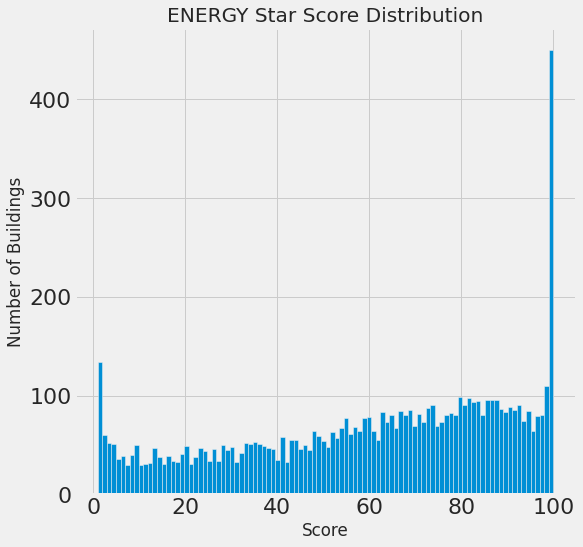

In [ ]:
#3
figsize(8, 8)
# score의 분포
# Histogram of the Energy Star Score
plt.style.use('fivethirtyeight')
plt.hist(train_labels['score'].dropna(), bins = 100);
plt.xlabel('Score'); plt.ylabel('Number of Buildings'); 
plt.title('ENERGY Star Score Distribution');

# Evaluating and Comparing Machine Learning Models

본 섹션에서는 여러 머신러닝모델을 학습하고 테스트하여 성능을 비교해본다.

Regression 성능 평가를 위해서  __mean absolute error(MAE)__를 측정하여 비교한다. 입력 feature들을 사용하지 않고 단순히 타겟값인 score의 median값으로 추정하는 baseline모델에서는 평균적으로 25정도의 차이를 보내는 성능을 얻었었다(MAE$\simeq$25).

## Imputing Missing Values

일반적인 머신러닝 모델에서는 missing value(결측치)를 자체적으로 처리하지 못하므로 missing value를 적절히 처리하는 전처리과정(preprocessing)이 필요하다. Part I에서 50%이상의 샘플에서 missing value가 있는 경우는 제거했으므로 이제 missing value들을 어떻게 채워넣을지에(imputation) 집중할 것이다. 이를 위해서는 여러 방법이 있지만 median 값으로 채워 넣는 등의 간단한 방법을 사용할 것이다.

본 코드에서는 각 column에서 구한 median값으로 missing value를 채워 넣기 위해서 Scikit-learn `SimpleImputer` 클래스 객체를 생성한다. (테스트데이터가 아닌) 학습데이터와 메서드 fit()을 이용하여 객체를 학습한다. 그리고나서 transform 메서드로 missing value를 각 column(feature)의 median값으로 대체하는 과정을 거치게 된다.

In [ ]:
#4
# Create an imputer object with a median filling strategy
# strategy 에는 missing value를 대체하는 값을 정한다
# median(중앙값), mean(평균), most_frequent(최빈값), constant(고정값)가 있다.
imputer = SimpleImputer(strategy='median')

# Train on the training features
imputer.fit(train_features)

# Transform both training data and testing data
# 이 결과는 ndarray임
# y 값은 앞서 nan 값을 모두 drop 했기 떄문에 X, 즉, feature에 대한 처리 수행
X_train = imputer.transform(train_features)
X_test = imputer.transform(test_features)

In [ ]:
# 확인 결과 median 값인 46.75로 수정됨
X_train[:5, 9]

array([99.41, 46.75, 46.75, 46.75, 28.65])

In [ ]:
print('Missing values in training features: ', np.sum(np.isnan(X_train)))
print('Missing values in testing features:  ', np.sum(np.isnan(X_test)))
print('Missing values in testing features:  ', np.sum(np.isnan(test_labels)))
print('Missing values in testing features:  ', np.sum(np.isnan(train_labels)))
type(X_test)
pd.DataFrame(X_train)

Missing values in training features:  0
Missing values in testing features:   0
Missing values in testing features:   score    0
dtype: int64
Missing values in testing features:   score    0
dtype: int64


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,...,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
0,13276.0,5849784.0,90300.0,1950.0,1.0,100.0,126.0,5.2,1.2,99.41,40.759206,-73.962474,7.0,218.0,6.088818,4.599253,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7377.0,4398442.0,52000.0,1926.0,1.0,100.0,95.4,4.7,0.9,46.75,40.835496,-73.887745,3.0,161.0,5.384036,3.849935,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9479.0,4665374.0,104700.0,1954.0,1.0,100.0,40.4,3.8,0.3,46.75,40.663206,-73.949469,9.0,329.0,5.017280,3.849935,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,14774.0,3393340.0,129333.0,1992.0,1.0,100.0,157.1,16.9,1.1,46.75,40.622968,-74.078742,1.0,27.0,6.510853,3.849935,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3286.0,2704325.0,109896.0,1927.0,1.0,100.0,62.3,3.5,0.0,28.65,40.782421,-73.972622,7.0,165.0,6.123589,3.355153,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6617,8818.0,4044737.0,55400.0,1958.0,1.0,90.0,72.3,2.9,0.7,52.05,40.897985,-73.897018,8.0,351.0,5.316157,3.952205,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6618,8027.0,2609697.0,106500.0,1928.0,1.0,100.0,73.7,3.7,0.0,77.65,40.876060,-73.881482,7.0,419.0,6.177944,4.352212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6619,8343.0,3119428.0,112339.0,1962.0,1.0,100.0,88.0,5.6,0.7,73.97,40.855922,-73.842325,11.0,296.0,6.108358,4.303660,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6620,1574.0,5039588.0,100244.0,1927.0,1.0,50.0,26.6,7.8,0.5,6.94,40.754436,-73.992915,4.0,111.0,5.683920,1.937302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Scaling Features

각 feature들은 단위가 다르고 범위가 제각각이다. Linear regression, decision tree 등은 feature의 스케일링에 따른 영향이 적은 반면, Euclidean 거리기반의 알고리즘인 SVM, KNN 등은 스케일링의 영향이 비교적 큰 것으로 알려져 있다.

대표적인 스케일링 방법으로는 다음 두 가지가 있다:

1. Standardization: 분포의 평균을 0, 표준편차를 1로 만드는 방법
2. Normalization: 최젓값을 0, 최댓값을 1로 만드는 방법

Missing value imputation과 마찬가지로 스케일링에 필요한 수치들은 학습데이터를 이용한다.

In [ ]:
#5
# Create the scaler object with a range of 0-1
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit on the training data
scaler.fit(X_train)

# Transform both the training and testing data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,...,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
0,0.885319,0.976425,0.004759,0.813514,0.007143,1.0,0.615234,0.101961,0.631579,0.004583,0.609179,0.551086,0.352941,0.002051,0.628070,0.600825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.491317,0.733867,0.000233,0.748649,0.007143,1.0,0.465820,0.092157,0.473684,0.002155,0.804575,0.708275,0.117647,0.001512,0.575320,0.545283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.631713,0.778478,0.006461,0.824324,0.007143,1.0,0.197266,0.074510,0.157895,0.002155,0.363301,0.578441,0.470588,0.003100,0.547869,0.545283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.985373,0.565887,0.009371,0.927027,0.007143,1.0,0.767090,0.331373,0.578947,0.002155,0.260242,0.306521,0.000000,0.000246,0.659658,0.545283,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.218074,0.450734,0.007075,0.751351,0.007143,1.0,0.304199,0.068627,0.000000,0.001321,0.668638,0.529740,0.352941,0.001550,0.630673,0.508609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6617,0.587563,0.674753,0.000635,0.835135,0.007143,0.9,0.353027,0.056863,0.368421,0.002400,0.964624,0.688770,0.411765,0.003308,0.570239,0.552864,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6618,0.534731,0.434920,0.006673,0.754054,0.007143,1.0,0.359863,0.072549,0.000000,0.003580,0.908469,0.721449,0.352941,0.003951,0.634741,0.582514,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6619,0.555838,0.520109,0.007363,0.845946,0.007143,1.0,0.429688,0.109804,0.368421,0.003410,0.856891,0.803814,0.588235,0.002788,0.629533,0.578915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6620,0.103727,0.841020,0.005934,0.751351,0.007143,0.5,0.129883,0.152941,0.263158,0.000320,0.596962,0.487054,0.176471,0.001040,0.597765,0.403514,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#6
# Convert y to one-dimensional array (vector)
y_train = np.array(train_labels).flatten()
y_test = np.array(test_labels).flatten()

In [ ]:
y_train.shape

(6622,)

## 모델 평가

다음 다섯 가지 머신러닝 모델을 비교 평가하고자 한다.

1. Linear Regression
2. Support Vector Machine Regression
3. Random Forest Regression
4. Gradient Boosting Regression
5. K-Nearest Neighbors Regression

각 모델들은 사용자가 정해주어야 하는 하이퍼파라미터들이 있는데 우선은 default값을 사용하여 기본적인 성능을 평가하고 이후에 하이퍼파라미터 튜닝을 통해 추가 성능 향상을 도모하기로 한다.

Scikit-learn의 가장 눈에 띄는 장점 중 하나는 모델들을 몇 줄만으로, 그리고 다양한 모델들을 비슷한 방법으로 학습시키고 테스트할 수 있다는 것이다.

In [ ]:
#7
# LinearRegression, 선형 회귀
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_mae = mean_absolute_error(y_test, lr_pred)

print('Linear Regression Performance on the test set: MAE = %0.4f' % lr_mae)

Linear Regression Performance on the test set: MAE = 13.4651


In [ ]:
#8
# KNeighborsRegression, KNN 회귀
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_mae = mean_absolute_error(y_test, knn_pred)

print('K-Nearest Neighbors Regression Performance on the test set: MAE = %0.4f' % knn_mae)

K-Nearest Neighbors Regression Performance on the test set: MAE = 13.0131


In [ ]:
#9
# Support Vector Regression, SVM회귀
svm = SVR(C = 1000, gamma = 0.1)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_mae = mean_absolute_error(y_test, svm_pred)

print('Support Vector Machine Regression Performance on the test set: MAE = %0.4f' % svm_mae)

Support Vector Machine Regression Performance on the test set: MAE = 10.9337


In [ ]:
#10
# RandomForestRegression, 랜덤포레스트회귀
rf = RandomForestRegressor(random_state=60)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_pred)

print('Random Forest Regression Performance on the test set: MAE = %0.4f' % rf_mae)

Random Forest Regression Performance on the test set: MAE = 9.5231


In [ ]:
#11
# GradientBoostingRegression, 
gb = GradientBoostingRegressor(random_state=60)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
gb_mae = mean_absolute_error(y_test, gb_pred)

print('Gradient Boosted Regression Performance on the test set: MAE = %0.4f' % gb_mae)

Gradient Boosted Regression Performance on the test set: MAE = 10.0116


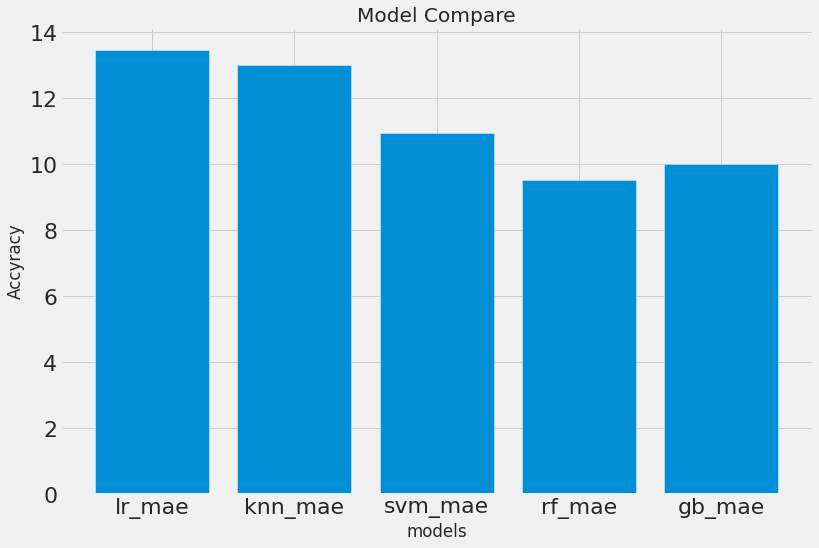

In [ ]:
#12
# 예측한 모델들의 mae를 비교
# 앞서 mean(평균)으로 비교했을때 24.5164

# Bar graph로 성능 비교하기
figsize(12, 8)
plt.style.use('fivethirtyeight')
# 축을 변경할 땐 barh
plt.bar(['lr_mae', 'knn_mae', 'svm_mae', 'rf_mae', 'gb_mae'], [lr_mae, knn_mae, svm_mae, rf_mae, gb_mae]);
plt.xlabel('models'); plt.ylabel('Accyracy'); 
plt.title('Model Compare');

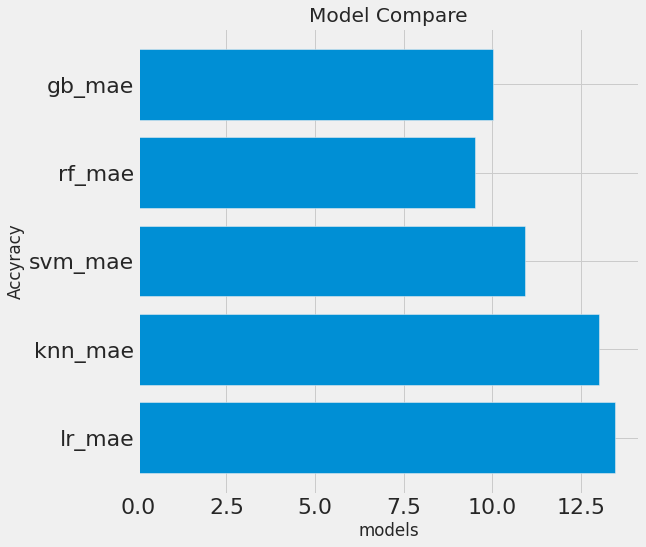

In [ ]:
figsize(8, 8)
plt.style.use('fivethirtyeight')
plt.barh(['lr_mae', 'knn_mae', 'svm_mae', 'rf_mae', 'gb_mae'], [lr_mae, knn_mae, svm_mae, rf_mae, gb_mae]);
plt.xlabel('models'); plt.ylabel('Accyracy'); 
plt.title('Model Compare');

여기부터는 `GradientBoostingRegressor`의 하이퍼파라미터를 최적화하는데 집중한다. Gradient Boosting 알고리즘은 Decision tree와 Boosting 기반의 앙상블 모델로서 캐글 등의 경진대회에서 많이 사용되는 기법으로 알려져 있다.

# Model Optimization 

In machine learning, optimizing a model means finding the best set of hyperparameters for a particular problem. 

## Hyperparameters

First off, we need to understand what [model hyperparameters are in contrast to model parameters](https://machinelearningmastery.com/difference-between-a-parameter-and-a-hyperparameter/) :

* Model __hyperparameters__ are best thought of as settings for a machine learning algorithm that are tuned by the data scientist before training. Examples would be the number of trees in the random forest, or the number of neighbors used in K Nearest Neighbors Regression. 
* Model __parameters__ are what the model learns during training, such as the weights in the linear regression.

충분히 학습되지 않는 underfit의 경우에는 모델의 복잡도를 높여서 해결할 수 있는데, 다음과 같은 방법으로 모델의 복잡도를 높일 수 있다:
* Decision tree: 깊은 tree 사용
* Polynomial regression: 더 높은 차수 사용
* SVM: 작은 C, nonlinear kernel 사용

Underfit인지 overfit인지 어떻게 알 수 있을까?

mean_absolute_errormean_absolute_errormean_absolute_errormean_absolute_errormean_absolute_errormean_absolute_errormean_absolute_errormean_absolute_errormean_absolute_errormean_absolute_errormean_absolute_error
printpsdsdfsdfsdfsddfdfdfㅇㄹdfdfdfmammmmm## Hyperparameter Tuning with Random Search and Cross Validation

* Random search: 옵션들의 범위를 지정하고 grid search와 달리 시도할 조합을 랜덤하게 선택한다. 랜덤 서치를 통해 범위를 좁혀놓고 다시 grid search를 시도해볼 수도 있다.

We first define a grid then peform an iterative process of: randomly sample a set of hyperparameters from the grid, evaluate the hyperparameters using 4-fold cross-validation, and then select the hyperparameters with the best performance. 

Of course we don't actually do this iteration ourselves, we let Scikit-Learn and `RandomizedSearchCV` do the process for us! 

In [ ]:
#13
# Gradient boosting regressor의 
# 6가지 하이퍼 파라미터를 각각 다르게 하여 성능 비교
# 각 파라미터 탐색 범위 지정

# Loss function to be optimized
loss = ['ls', 'lad', 'huber']

# Number of trees used in the boosting process
n_estimators = [100, 500, 900, 1100, 1500]

# Maximum depth of each tree
max_depth = [2, 3, 5, 10, 15]

# Minimum number of samples per leaf
min_samples_leaf = [1, 2, 4, 6, 8]

# Minimum number of samples to split a node
min_samples_split = [2, 4, 6, 10]

# Maximum number of features to consider for making splits
max_features = ['auto', 'sqrt', 'log2', None]

# Define the grid of hyperparameters to search
hyperparameter_grid = {'loss': loss,
                       'n_estimators': n_estimators,
                       'max_depth': max_depth,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

Gradient boosting regressor의 hyperparameter 중 6개를 선택하였는데, 어떤 값들이 가장 좋을 성능을 낼지 알기 위해서는 모든 조합을 시도해봐야 한다.(3x5x5x5x4x4=6000)

아래 코드에서 RandomizedSearchCV 클래스의 객체를 생성할 때 아래의 파라미터들을 입력으로 준다:

* `estimator`: the model-모델
* `param_distributions`: the distribution of parameters we defined
* `cv` the number of folds to use for k-fold cross validation
* `n_iter`: the number of different combinations to try-랜덤 조합 선택 갯수
* `scoring`: which metric to use when evaluating candidates-최적의 값 선택할 기준
* `n_jobs`: number of cores to run in parallel (-1 will use all available)
* `verbose`: how much information to display (1 displays a limited amount) 
* `return_train_score`: return the training score for each cross-validation fold
* `random_state`: fixes the random number generator used so we get the same results every run

In [ ]:
# Create the model to use for hyperparameter tuning
# 모델 생성
model = GradientBoostingRegressor(random_state = 42)

# Set up the random search with 4-fold cross validation
# RandomizedSearchCV() : 사전에 설정한 하이퍼파라미터의 조건을 바꿔가면서 모델 테스트
# n_iter: 샘플링할 모델의 갯수, 증가하면 시간은 오래 걸리지만 결과로 나오는 모델의 퀄리티가 상승
# cv: cross validation 분할 방법, k-fold에서 fold 수, 4인 경우 데이터를 4개로 나눠서 train, test에 사용
# scoring: 성능 평가 지표, neg_mean_absolute_error는 mae를 가리킴
# n_jobs: 사용할 코어 갯수, -1인 경우 모든 프로세서 사용
# verbose: 진행 상황 표시
# return_train_score: train_score를 cv_results_에 포함 하는지 여부
# random_state: 무작위 균일 샘플링에 사용되는 의사 난수 생성기 상태
random_cv = RandomizedSearchCV(estimator=model,
                               param_distributions=hyperparameter_grid,
                               cv=4, n_iter=1, 
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True,
                               random_state=42)

In [ ]:
# Fit on the training data
random_cv.fit(X_train, y_train)

Fitting 4 folds for each of 1 candidates, totalling 4 fits


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


RandomizedSearchCV(cv=4, estimator=GradientBoostingRegressor(random_state=42),
                   n_iter=1, n_jobs=-1,
                   param_distributions={'loss': ['ls', 'lad', 'huber'],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 4, 6, 10],
                                        'n_estimators': [100, 500, 900, 1100,
                                                         1500]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=1)

Scikit-learn uses the negative mean absolute error for evaluation because it wants a metric to maximize.

In [ ]:
# Get all of the cv results and sort by the test performance
# random_cv의 결과 확인
# random_cv.cv_results_ 에 그 결과가 저장되어 있음
random_results = pd.DataFrame(random_cv.cv_results_).sort_values('mean_test_score', ascending = False)

# mean_test_score를 확인해보면 더 좋은 것이 어떤 것인지 알 수 있음
# 그떄의 파라미터들은 param_으로 시작하는 columns에서 확인 가능
random_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_loss,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,4.385991,0.019175,0.006934,0.000279,100,2,6,auto,5,ls,"{'n_estimators': 100, 'min_samples_split': 2, ...",-9.100775,-9.026538,-9.456636,-9.201011,-9.19624,0.162589,1,-7.302003,-7.312645,-7.173397,-7.386171,-7.293554,0.076569


In [ ]:
# 구한 랜덤 파라미터중 가장 좋은 파라미터 집합 출력
random_cv.best_estimator_

GradientBoostingRegressor(loss='ls', max_depth=5, max_features='auto',
                          min_samples_leaf=6, random_state=42)

The best gradient boosted model has the following hyperparameters:

* `loss = lad`
* `n_estimators = 500`
* `max_depth = 5`
* `min_samples_leaf = 6`
* `min_samples_split = 6`
* `max_features = None` (This means that `max_features = n_features` according to the docs)

Using random search is a good method to narrow down the possible hyperparameters to try.
(random search를 통해 시도할만한 하이퍼파라미터의 범위를 줄일 수 있다.)

We could use the random search results to inform a grid search by creating a grid with hyperparameters close to those that worked best during the randomized search. 
(random search에서 가장 좋은 결과를 얻은 하이퍼파라미터값들을 중심으로 grid를 만들어 grid search를 한다.)

However, rather than evaluating all of these settings again, I will focus on a single one, the number of trees in the forest (`n_estimators`). 
(여러 하이퍼파라미터들 중 `n_estimators`(tree의 개수)만 grid search를 하도록 한다.)

By varying only one hyperparameter, we can directly observe how it affects performance. In the case of the number of trees, we would expect to see a significant affect on the amount of under vs overfitting.
(하나의 하이퍼파라미터만 변화시킴으로써 해당 하이퍼파라미터의 영향을 파악할 수 있다.)

In [51]:
# Create a range of trees to evaluate
trees_grid = {'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]}

model = GradientBoostingRegressor(loss = 'lad', max_depth = 5,
                                  min_samples_leaf = 6,
                                  min_samples_split = 6,
                                  max_features = None,
                                  random_state = 42)

# Grid Search Object using the trees range and the random forest model
# GridSearchCV() : 주어진 파라미터를 모두 평가
# estimator: 평가할 모델
# param_grid: 하이퍼파라미터 목록을 dictionary 로 전달
# cv: cross validation 분할 방법, k-fold에서 fold 수, 4인 경우 데이터를 4개로 나눠서 train, test에 사용
# scoring: 성능 평가 지표, neg_mean_absolute_error는 mae를 가리킴
# verbose: 진행 상황 표시
# n_jobs: 사용할 코어 갯수, -1인 경우 모든 프로세서 사용
# return_train_score: train_score를 cv_results_에 포함 하는지 여부
grid_search = GridSearchCV(estimator = model, param_grid=trees_grid, cv = 4, 
                           scoring = 'neg_mean_absolute_error', verbose = 1,
                           n_jobs = -1, return_train_score = True)

In [ ]:
# #16
# # Create a range of trees to evaluate
# grid = {'min_samples_split': [6,7,8,9,10]}

# model = GradientBoostingRegressor(loss = 'lad', max_depth = 5,
#                                   min_samples_leaf = 6,
#                                   n_estimators = 50,
#                                   max_features = None,
#                                   random_state = 42)

# # Grid Search Object using the trees range and the random forest model
# grid_search = GridSearchCV(estimator = model, param_grid=grid, cv = 4, 
#                            scoring = 'neg_mean_absolute_error', verbose = 1,
#                            n_jobs = -1, return_train_score = True)

In [52]:
#17
# Fit the grid search
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 15 candidates, totalling 60 fits


KeyboardInterrupt: ignored

In [ ]:
#18
grid_search.cv_results_

{'mean_fit_time': array([ 5.81279629,  8.56881547, 11.25114417, 14.04056948, 16.74979985,
        19.49860841, 22.11348492, 24.98245478, 27.73183221, 30.29122108,
        32.73584276, 35.59810609, 38.40495092, 41.11279279, 44.07347953]),
 'mean_score_time': array([0.00715297, 0.00958031, 0.01141512, 0.01354915, 0.01539034,
        0.01749599, 0.01936632, 0.02203226, 0.02281219, 0.02484775,
        0.02646405, 0.0290851 , 0.03034329, 0.03183311, 0.03394711]),
 'mean_test_score': array([-9.15135744, -9.09488252, -9.07134894, -9.04734372, -9.03066256,
        -9.024209  , -9.02048761, -9.02190606, -9.01557331, -9.01091305,
        -9.01125559, -9.0097535 , -9.00671913, -9.00023311, -9.00164544]),
 'mean_train_score': array([-7.87835169, -7.64758618, -7.48560597, -7.31856377, -7.17512657,
        -7.06214002, -7.00163705, -6.93087355, -6.870624  , -6.80286207,
        -6.75566694, -6.71861749, -6.66895348, -6.61943839, -6.58857716]),
 'param_n_estimators': masked_array(data=[100, 150, 200,

In [ ]:
# Get the results into a dataframe
results = pd.DataFrame(grid_search.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,5.812796,0.060382,0.007153,0.000145,100,{'n_estimators': 100},-9.072152,-8.899126,-9.450096,-9.184055,-9.151357,0.200130,15,-7.915345,-7.780039,-7.877064,-7.940959,-7.878352,0.061146
1,8.568815,0.096706,0.009580,0.000231,150,{'n_estimators': 150},-9.003669,-8.829203,-9.426892,-9.119767,-9.094883,0.217804,14,-7.682852,-7.497190,-7.710097,-7.700206,-7.647586,0.087377
2,11.251144,0.056357,0.011415,0.000477,200,{'n_estimators': 200},-8.975158,-8.820733,-9.401868,-9.087638,-9.071349,0.213055,13,-7.550907,-7.340325,-7.578415,-7.472777,-7.485606,0.092397
3,14.040569,0.148542,0.013549,0.000285,250,{'n_estimators': 250},-8.961545,-8.787539,-9.397774,-9.042517,-9.047344,0.222309,12,-7.414502,-7.185633,-7.403834,-7.270286,-7.318564,0.095494
4,16.749800,0.083523,0.015390,0.000322,300,{'n_estimators': 300},-8.945446,-8.788870,-9.366920,-9.021414,-9.030663,0.211471,11,-7.271314,-7.059770,-7.209806,-7.159616,-7.175127,0.077463
5,19.498608,0.292358,0.017496,0.000332,350,{'n_estimators': 350},-8.941344,-8.784130,-9.349656,-9.021706,-9.024209,0.206414,10,-7.159768,-6.998551,-7.047694,-7.042547,-7.062140,0.059513
6,22.113485,0.125909,0.019366,0.000687,400,{'n_estimators': 400},-8.936921,-8.770823,-9.344459,-9.029748,-9.020488,0.208782,8,-7.081670,-6.923591,-7.019695,-6.981593,-7.001637,0.057498
7,24.982455,0.082525,0.022032,0.001459,450,{'n_estimators': 450},-8.938611,-8.776240,-9.334580,-9.038194,-9.021906,0.203298,9,-7.021458,-6.872750,-6.947796,-6.881490,-6.930874,0.059810
8,27.731832,0.208332,0.022812,0.000665,500,{'n_estimators': 500},-8.924621,-8.775078,-9.325044,-9.037550,-9.015573,0.201473,7,-6.934705,-6.837958,-6.869084,-6.840749,-6.870624,0.038950
9,30.291221,0.220310,0.024848,0.001017,550,{'n_estimators': 550},-8.918502,-8.756938,-9.325492,-9.042721,-9.010913,0.207975,5,-6.874737,-6.781878,-6.809121,-6.745712,-6.802862,0.047201


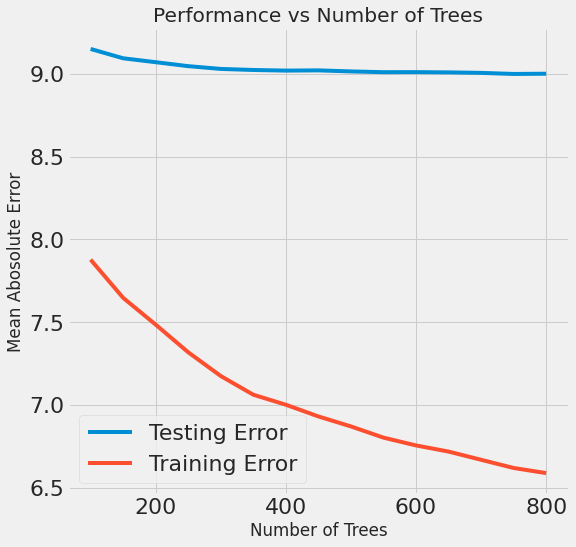

In [ ]:
# Plot the training and testing error vs number of trees
figsize(8, 8)
plt.style.use('fivethirtyeight')
plt.plot(results['param_n_estimators'], -1 * results['mean_test_score'], label = 'Testing Error')
plt.plot(results['param_n_estimators'], -1 * results['mean_train_score'], label = 'Training Error')
plt.xlabel('Number of Trees'); plt.ylabel('Mean Abosolute Error'); plt.legend();
plt.title('Performance vs Number of Trees');

In [ ]:
results.sort_values('mean_test_score', ascending = False).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
13,41.112793,0.299489,0.031833,0.000909,750,{'n_estimators': 750},-8.901092,-8.751699,-9.298411,-9.049730,-9.000233,0.201840,1,-6.716494,-6.660453,-6.520818,-6.579989,-6.619438,0.074807
14,44.073480,0.361394,0.033947,0.000751,800,{'n_estimators': 800},-8.903857,-8.758299,-9.296941,-9.047485,-9.001645,0.198797,2,-6.689643,-6.648109,-6.486269,-6.530287,-6.588577,0.083101
12,38.404951,0.149535,0.030343,0.000670,700,{'n_estimators': 700},-8.904269,-8.755862,-9.312990,-9.053755,-9.006719,0.205815,3,-6.743886,-6.695770,-6.611240,-6.624919,-6.668953,0.053861
11,35.598106,0.312155,0.029085,0.001712,650,{'n_estimators': 650},-8.906208,-8.755401,-9.325190,-9.052215,-9.009754,0.210191,4,-6.778068,-6.721452,-6.708191,-6.666758,-6.718617,0.039814
9,30.291221,0.220310,0.024848,0.001017,550,{'n_estimators': 550},-8.918502,-8.756938,-9.325492,-9.042721,-9.010913,0.207975,5,-6.874737,-6.781878,-6.809121,-6.745712,-6.802862,0.047201


From this plot, it's pretty clear that our model is [overfitting](https://elitedatascience.com/overfitting-in-machine-learning)! The training error is significantly lower than the testing error, which shows that the model is learning the training data very well but then is not able to generalize to the test data as well.

학습데이터에 대한 성능 평가와 테스트데이터에 대한 성능 평가 차이는 언제나 존재하지만 그 차이가 너무 크다면 overfitting을 줄일 방법을 생각해봐야 한다(학습데이터 양을 늘리거나 모델의 복잡도를 줄이는 등) some options include reducing the number of trees, reducing the max depth of each tree, and increasing the minimum number of samples in a leaf node.

# Evaluate Final Model on the Test Set

In [ ]:
# Default model
default_model = GradientBoostingRegressor(random_state = 42)

# Select the best model
final_model = grid_search.best_estimator_

final_model

GradientBoostingRegressor(loss='lad', max_depth=5, min_samples_leaf=6,
                          min_samples_split=6, n_estimators=750,
                          random_state=42)

In [ ]:
# -n: 한번의 run 마다 반복 횟수
# -r: run 실행 횟수
%%timeit -n 1 -r 5
default_model.fit(X_train, y_train)

# 결과 해석
# 1 loop - 한번 반복
# best of 5: 2.54s per loop - 5번 실행 중 loop 마다 가장 좋은 결과는 2.54

1 loop, best of 5: 2.54 s per loop


In [ ]:
%%timeit -n 1 -r 5
final_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:297: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:297: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:297: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:297: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:297: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be rem

1 loop, best of 5: 36.2 s per loop


In [ ]:
default_pred = default_model.predict(X_test)
final_pred = final_model.predict(X_test)

print('Default model performance on the test set: MAE = %0.4f.' % mean_absolute_error(y_test, default_pred))
print('Final model performance on the test set:   MAE = %0.4f.' % mean_absolute_error(y_test, final_pred))

Default model performance on the test set: MAE = 10.0119.
Final model performance on the test set:   MAE = 9.0474.


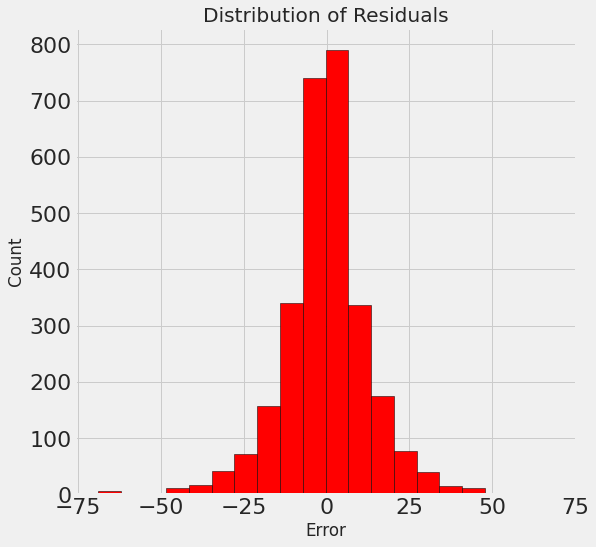

In [ ]:
figsize = (6, 6)

# Calculate the residuals 
residuals = final_pred - y_test

# Plot the residuals in a histogram
plt.hist(residuals, color = 'red', bins = 20,
         edgecolor = 'black')
plt.xlabel('Error'); plt.ylabel('Count')
plt.title('Distribution of Residuals');

# Conclusions

본 ipynb파일에서는 다음의 머신러닝 과정을 다루었다:

* Imputing missing values
  - 결측치 처리
* Evaluating and comparing several machine learning methods
  - 여러가지 머신러닝 모델들의 비교 및 평가
* Hyperparameter tuning a machine learning model using random search and cross validation
  - 하이퍼 파라미터 튜닝
* Evaluating the best model on the testing set
  - 디폴트 모델과 튜닝한 모델 중 최고 성능 모델의 성능 비교